<a href="https://colab.research.google.com/github/Na3aga/KPI_notebooks/blob/main/Havryliuk_Nazar_KM_82_MO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

**Збіжність методу найскорішого спуску при мінімізації степеневої функції**

## Постановка задачі

Дослідити збіжність методу найшвидшого спуску при мінімізації степеневої функції в залежності від:
1. Величини кроку h при обчисленні похідних.
2. Схеми обчислення похідних.
3. Способу обчислення кроку : постійний, оптимальний.
4. Виду методу одновимірного пошуку (ДСК-Пауелла або Золотого
перетину).
5. Точності методу одновимірного пошуку.
6. Значення параметру в алгоритмі Свена.
7. Вигляду критерію закінчення: 
$$\begin{cases}
    \frac{\|x_{k} - x_{k-1}\|}{\|x_{k}\|} \leq \varepsilon\\
    |f(x_{k})-f(x_{k-1})| \leq \varepsilon\\
 \end{cases}~~або~~||\nabla f(x^{(k)})|| \leq \varepsilon~.$$ 

Використати метод проєкції градієнта Розена для умовної оптимізації при розташуванні локального мінімуму поза випуклої допустимої області (лінійні обмеження).

## Анотація
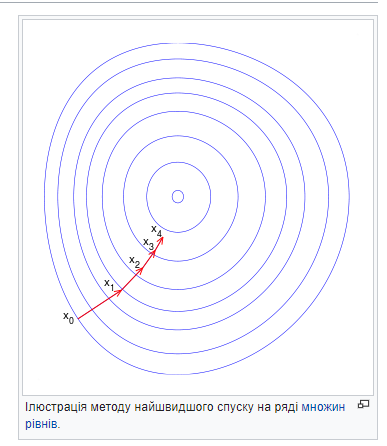
Як відомо, напрямком найшвидшого спуску є антиградієнт цільової
функції. Але при наявності обмежень рух уздовж напрямку найшвидшого
спуску може привести до недопустимих точок. У методі проекції градієнта Розена антиградієнт проектується таким чином, що значення цільової функції
покращується і, в той же час, зберігається допустимість точок траєкторії

## Вступ

Мета роботи: дослідити збіжність методу найшвидшого спуску при мінімізації степеневої функції в залежності від параметрів, що вказані в постановці задачі.


## Імпорт бібліотек та допоміжних функцій

1.   numpy
2.   numpy.linalg.norm
3.   matplotlib.pyplot
4.   matplotlib.cm
5.   mpl_toolkits.mplot3d.Asex3D
6.   time



In [ ]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import time

## Основні функції

Степенева функцiя: $~~z = (10*((x-y)^{2} + (x-1)^{2}))^{2}$.

In [ ]:
def step_func(x, y):
  return pow(10 * (x - y)**2 + (x - 1)**2, 2)

x_arr = np.arange(-1.5, 2.5, 0.01)
y_arr = np.arange(-2, 3, 0.01)
step_func_arr = np.array([[step_func(x, y) for x in x_arr] for y in y_arr])

Частинні похідні степеневої функції

In [ ]:
def dStepdx(x, y):
  return 2 * (10*pow((x-y),2) + pow(x-1,2)) * (22*x - 20*y - 2)

def dStepdy(x, y):
  return - 40 * (10*pow(x-y,2) + pow(x-1,2)) * (x - y)

## Обчислення

Побудова графіка степеневої функції.


Використані джерела:
https://matplotlib.org/ , 

https://mipt-stats.gitlab.io/courses/python/06_matplotlib.html

In [ ]:
def step_func_graph1():
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(15, -115)

  x, y = np.meshgrid(x_arr, y_arr)
  surf = ax.plot_surface(x, y, step_func_arr, cmap = cm.Spectral, linewidth = 0, antialiased = False)
  
  fig.colorbar(surf, shrink = 0.5, aspect = 5)

  plt.show()

Графік ізоліній:

In [ ]:
def step_func_graph2():
  x = np.linspace(-1.5, 2.5, 100)
  y = np.linspace(-2., 3., 100)
  X, Y = np.meshgrid(x,y)
  Z = step_func(X, Y)

  fig = plt.figure(0)
  plt.clf()
  plt.contourf(X, Y, Z, 20)
  plt.colorbar()
  plt.contour(X, Y, Z, 20, colors = "black")
  plt.grid()
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()

Монотонний варіант для більш зручної подальшої візуалізації:

In [ ]:
def step_func_graph3():
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(15, -115)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, step_func_arr)

  plt.show()

Метод найскорішого спуску з точки (x_init, y_init) ***з постійним кроком*** lmd. Результат перших N ітерацій.

In [ ]:
def grad_discent_const(N, lmd, x_init, y_init):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(15, -115)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, step_func_arr, color='yellow', alpha=0.5)

  # відображення початкової точки
  ax.scatter(x_init, y_init, step_func(x_init, y_init), c='blue', s=30)
  print('x_init',x_init)
  print('y_init',y_init)
  for i in range(N):
    x_init = x_init - lmd * dStepdx(x_init, y_init)
    y_init = y_init - lmd * dStepdy(x_init, y_init)

    ax.scatter(x_init, y_init, step_func(x_init, y_init), c='blue', s=2)

  ax.scatter(x_init, y_init, step_func(x_init, y_init), c='blue', s=30)
  
  plt.show()

  print('\nОтримана точка: (%.2f, %.2f)' % (x_init, y_init))

Метод золотого перетину.

http://dit.isuct.ru/IVT/sitanov/Literatura/M171/Pages/Glava1_3.htm

In [ ]:
def gold_ratio(f, a, b, eps):
  if a > b:
    a, b = b, a

  x1 = a + 0.382 * (b - a)
  x2 = b - 0.382 * (b - a)
  A = f(x1)
  B = f(x2)
  
  while b - a > eps:
    if A < B:
      b = x2
      if b - a < eps:
        break

      x2 = x1
      B = A
      x1 = a + 0.382 * (b - a)
      A = f(x1)
    else:
      a = x1
      if b - a < eps:
        break

      x1 = x2
      A = B
      x2 = b - 0.382 * (b - a)
      B = f(x2)

  return (a + b) / 2

Функція **descent_optim1** реалізує метод найскорішого спуску з оптимальним кроком на прикладі степеневої функції.

http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0

---
Параметри функції: lmd - початковий крок, (x_init, y_init) - початкова точка, eps - точність розрахунку, eps_lmd - точність одновимірного пошуку (метод золотого перетину), t - обмеження виконання по часу.

Критерій закінчення: $||\nabla f(x^{(k)})|| \leq \varepsilon$.


In [ ]:
def descent_optim1(lmd, x_init, y_init, eps, eps_lmd, t):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(15, -115)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, step_func_arr, color='yellow', alpha=0.5)

  a = 0
  b = 2 * lmd

  count = 0
  start = time.time()

  grad_norm = norm([dStepdx(x_init, y_init), dStepdy(x_init, y_init)])
  
  ax.scatter(x_init, y_init, step_func(x_init, y_init), c='blue', s=30)
  ax.text(x_init + .08, y_init + .06, step_func(x_init, y_init) + .1, 'Початкова точка', fontsize=12)

  while grad_norm > eps:
    count += 1
    ax.scatter(x_init, y_init, step_func(x_init, y_init), c='blue', s=2)

    def f1(lmd):
      return step_func(x_init - lmd * dStepdx(x_init, y_init), y_init - lmd * dStepdy(x_init, y_init))
    
    lmd = gold_ratio(f1, a, b, eps_lmd)

    x_init = x_init - lmd * dStepdx(x_init, y_init)
    y_init = y_init - lmd * dStepdy(x_init, y_init)

    grad_norm = norm([dStepdx(x_init, y_init), dStepdy(x_init, y_init)])    

    if time.time() - start > t:      
      break

  ax.scatter(x_init, y_init, step_func(x_init, y_init), c='blue', s=30)
  ax.text(x_init + .1, y_init + .1, step_func(x_init, y_init) + .06, 'Отримана точка', fontsize=12)
  
  plt.show()
  
  print('\nОтримана точка: (%.5f, %.5f)' % (x_init, y_init))
  print('Кількість ітерацій: %d' %count)
  print(r'Норма градієнта: %.2f' %grad_norm)

Функція **descent_optim2** реалізує метод найскорішого спуску з оптимальним кроком на прикладі степеневої функції.

---
Параметри функції: lmd - початковий крок, (x_init, y_init) - початкова точка, eps - точність розрахунку, eps_lmd - точність одновимірного пошуку (метод золотого перетину), t - обмеження по часу.

Критерій закінчення: $\begin{cases}
    \frac{\|x_{k} - x_{k-1}\|}{\|x_{k}\|} \leq \varepsilon\\
    |f(x_{k})-f(x_{k-1})| \leq \varepsilon\\
 \end{cases}$.


In [ ]:
def descent_optim2(lmd, x_init, y_init, eps, eps_lmd, t):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(15, -115)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, step_func_arr, color='yellow', alpha=0.5)

  a = 0
  b = 2 * lmd

  count = 0
  start = time.time()

  x_delta = norm([lmd * dStepdx(x_init, y_init), lmd * dStepdy(x_init, y_init)]) / norm([x_init, y_init])
  f_delta = abs(step_func(x_init - lmd * dStepdx(x_init, y_init), y_init - lmd * dStepdy(x_init, y_init)) - step_func(x_init, y_init))
  
  ax.scatter(x_init, y_init, step_func(x_init, y_init), c='blue', s=30)
  ax.text(x_init - 1.1, y_init + .06, step_func(x_init, y_init) + .25, 'Початкова точка', fontsize=12)

  while x_delta > eps or f_delta > eps:
    count += 1
    ax.scatter(x_init, y_init, step_func(x_init, y_init), c='blue', s=2)

    def f1(lmd):
      return step_func(x_init - lmd * dStepdx(x_init, y_init), y_init - lmd * dStepdy(x_init, y_init))
    
    lmd = gold_ratio(f1, a, b, eps_lmd)

    x_init = x_init - lmd * dStepdx(x_init, y_init)
    y_init = y_init - lmd * dStepdy(x_init, y_init)

    x_delta = norm([lmd * dStepdx(x_init, y_init), lmd * dStepdy(x_init, y_init)]) / norm([x_init, y_init])
    f_delta = abs(step_func(x_init - lmd * dStepdx(x_init, y_init), y_init - lmd * dStepdy(x_init, y_init)) - step_func(x_init, y_init)) 

    if time.time() - start > t:
      break

  ax.scatter(x_init, y_init, step_func(x_init, y_init), c='blue', s=30)
  ax.text(x_init + .1, y_init + .1, step_func(x_init, y_init) + .06, 'Отримана точка', fontsize=12)
  
  plt.show()
  
  print('\nОтримана точка: (%.5f, %.5f)' % (x_init, y_init))
  print('Кількість ітерацій: %d' %count)

## Відображення результатів

Побудуємо графік степеневої функції на множині $~[-1.5,~ 2.5]\times[-2, ~3]$ .

Неважко перевірити (аналітично), що точкою глобального мінімуму степеневої функції є точка (1, 1), в якій вона набуває значення 0.

Графік 1


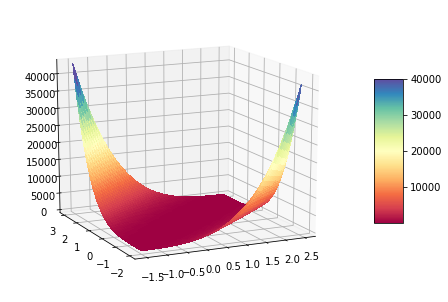

In [ ]:
print('Графік 1')
step_func_graph1()

Графік ізоліній:

Графік 2


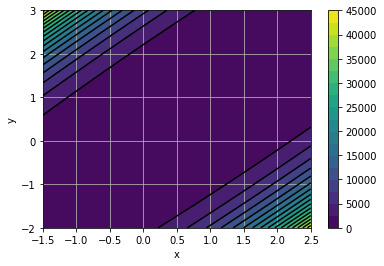

In [ ]:
print('Графік 2')
step_func_graph2()

Для більш зручної візуалізації надалі будемо використовувати "монотонний" варіант графіка 1 (в подальшому - жовтого кольору):

Графік 3


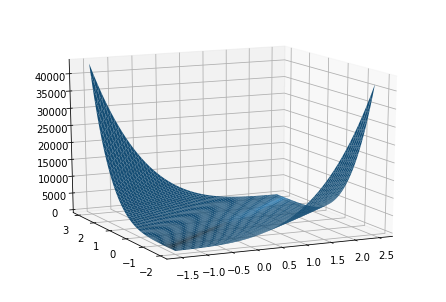

In [ ]:
print('Графік 3')
step_func_graph3()

Застосуємо до степеневої функції метод найскорішого спуску ***з постійним кроком***. В залежності від величини кроку та початкової точки, результати для перших 3000 ітерацій будут наступними:

Графік 4
x_init -1.2
y_init 0


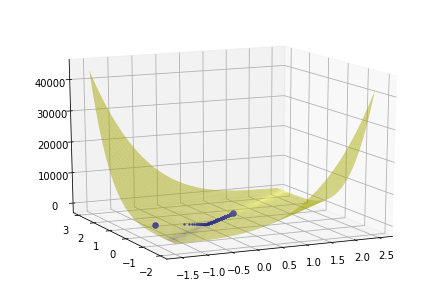


Отримана точка: (0.61, 0.59)


In [ ]:
print('Графік 4')
grad_discent_const(3000, 0.0005, -1.2, 0)

Графік 5
x_init -1.5
y_init 0.1


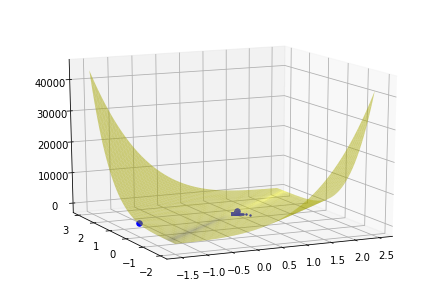


Отримана точка: (0.76, 0.75)


In [ ]:
print('Графік 5')
grad_discent_const(3000, 0.001, -1.5, 0.1)

Графік 6
x_init 2
y_init 2


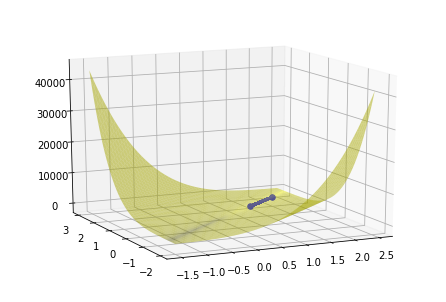


Отримана точка: (1.20, 1.21)


In [ ]:
print('Графік 6')
grad_discent_const(3000, 0.002, 2, 2)

Застосуємо до степеневої функції метод найскорішого спуску ***з оптимальним  кроком***. Для оптимізації кроку будемо використовувати один з методів одновимірного пошуку, наприклад, ***метод золотого перетину***. Попередньо реалізуємо його у функції gold_ratio(f, a, b, eps), де f - функція, яку треба дослідити на локальний мінімум на відрізку [a, b], eps - допустима похибка. Перевіримо роботу функції gold_ratio на прикладі пошуку локального мінімуму функції $y = 2x^2 - 10x + 15$ на відрізку [0, 5] (неважко перевірити, що точкою мінімуму буде 2.5). Нехай допустима похибка eps = 0.01.

In [ ]:
def f(x):
  return 2*x ** 2 - 10 * x + 15

x = gold_ratio(f, 0, 5, 0.01) 
print(x)

2.502852531269397


Отже, функція працює коректно.


Для мінімізації степеневої функції застосуємо метод найскорішого спуску з оптимальним кроком і критерієм закінчення $||\nabla f(x^{(k)})|| \leq \varepsilon$.

---
**Параметри:** крок lmd = 0.01, початкова точка (-1.5, 3), точність розрахунку eps = 0.001, точність одновимірного пошуку (метод золотого перетину) eps_lmd = 0.0001.

**Зауваження 1:** якщо протягом 15 секунд функція не досягає критерію закінчення, вона перериває своє виконання, виводить поточне значення $||\nabla f(x^{(k)})||$ та отриману точку. 

**Зауваження 2:** наведене обмеження за часом є обмеженням саме на пошук мінімуму (тобто виконання циклу while); загальний час виконання функції (пошук мінімуму та візуалізація результату) може істотно перевищувати вказане обмеження. 

Графік 7


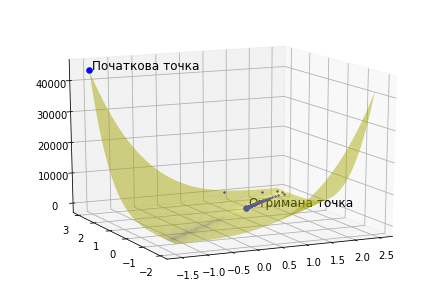


Отримана точка: (1.07009, 1.07367)
Кількість ітерацій: 2512
Норма градієнта: 0.00
Час виконання: 12 сек


In [ ]:
print('Графік 7')

start = time.time()
descent_optim1(0.01, -1.5, 3, 0.001, 0.0001, 15)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

Змінимо критерій закінчення на $\begin{cases}
    \frac{\|x_{k} - x_{k-1}\|}{\|x_{k}\|} \leq \varepsilon\\
    |f(x_{k})-f(x_{k-1})| \leq \varepsilon\\
 \end{cases}$ та початкову точку на (2.5, -2). 

-------


Змінимо точність одновимірного пошуку (метод золотого перетину) на eps_lmd = 0.00001.

Графік 7


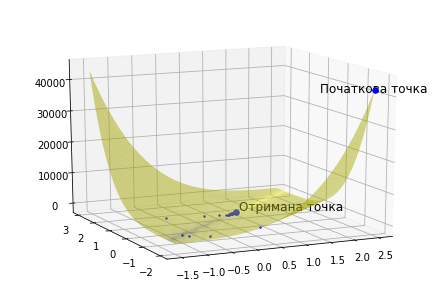


Отримана точка: (0.73896, 0.72595)
Кількість ітерацій: 136
Час виконання: 1 сек


In [ ]:
print('Графік 7')
start = time.time()
descent_optim2(0.01, 2.5, -2, 0.001, 0.00001, 15)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

Змінимо величину початкового кроку на lmd = 0.1, точність пошуку на eps = 0.01, точність одновимірного пошуку на eps_lmd = 0.001.

Графік 9


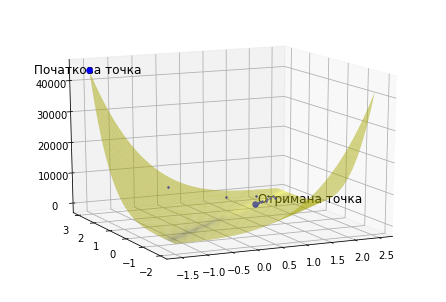


Отримана точка: (1.38295, 1.39422)
Кількість ітерацій: 16
Час виконання: 0 сек


In [ ]:
print('Графік 9')

start = time.time()
descent_optim2(0.05, -1.5, 3, 0.01, 0.0001, 15)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

## Висновки


Зображена на графіках 1 - 3 степенева функція задається рівнянням $~z = (10(x - y)^{2} + (x-1)^2)^{2}$ . Її глобальний мінімум -   точка (1, 1), в якій вона набуває значення 0. Наведена функція є одним з прикладів функцій, для яких мінімізація градієнтними методами є нетривіальною задачею.


Ще один широко відомий приклад подібної функції - функція Розенброка, проте, на відміну від функції Розенброка, степенева функція не є диференційованою в точці свого глобального мінімуму.

На графіках 4 - 6 бачимо, що результати застосування до степеневої функції методу найскорішого спуску з постійним кроком можуть істотньо відрізнятись в залежності від обраної початкової точки та кроку. Результати перших 3000 ітерацій можуть бути:

Або зовсім неточними (як на графіках 4 та 5);

Або відносно точними (графік 6).

А на графіках 7 - 9 бачимо, що реалізації методу найскорішого спуску з оптимальним кроком можути мати різну ефективність та давати різні результати в залежності від точності використовуваного методу одновимірного пошуку, критерію закінчення, точності розрахунку та інших параметрів. 

## Автор роботи

Гаврилюк Назар, КМ-82, na3aga@gmail.com

## Джерела
Gradient Descent in Python (towardsdatascience.com), Press W.H., Teukolsky S.A., Vetterling W.T., Flannery B.P. Section 17.5.1. Rosenbrock Methods // Numerical Recipes: The Art of Scientific Computing. — 3rd. — New York: Cambridge University Press, 2007. — ISBN 978-0-521-88068-8.
Jeffery J. Leader. Numerical Analysis and Scientific Computation. — Addison Wesley, 2004. — ISBN 0-201-73499-0.
Shoup T., Mistree F. Optimization methods: with applications for personal computers. — Prentice Hall, 1987.
